***
# Survival Analysis using Lifelines
***
**Overview** <br>
Time to Event Analysis - Estimates lifespan of a particular population

**Data**<br>
No need for exact starting and ending points

***
## Resources
https://towardsdatascience.com/survival-analysis-part-a-70213df21c2e <br>
https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e <br>
https://github.com/zangell44/survival-analysis-lifeline-basics/blob/master/customer_churn.ipynb <br>
https://towardsdatascience.com/survival-analysis-in-python-a-model-for-customer-churn-e737c5242822 <br>
https://github.com/loldja/loldja.github.io/blob/master/assets/code/blog/Kaplan%20Meier%20demo.ipynb <br>
http://savvastjortjoglou.com/nfl-survival-analysis-kaplan-meier.html
***

Import dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

This telecom dataset is a commonly used churn dataset for the public to use

In [9]:
# For the masses
churn_data = pd.read_csv(
    'https://raw.githubusercontent.com/treselle-systems/'
    'customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
# For the locals
df=pd.read_csv("C:\\Users\\wallj\\DS_Projects\\churn_data\\customer_churn_analysis\\WA_Fn-UseC_-Telco-Customer-Churn.csv")

Learning more about this dataset...

In [11]:
print(df.shape)
print(df.info())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), in

In [12]:
# fun function to look at your data in a different way
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [13]:
display_all(df.tail().transpose())

,7038,7039,7040,7041,7042
customerID,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,1,0
Partner,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,No,No
tenure,24,72,11,4,66
PhoneService,Yes,Yes,No,Yes,Yes
MultipleLines,Yes,Yes,No phone service,Yes,No
InternetService,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,Yes,No,Yes


### Data Preparation here...

In [14]:
# transform tenure and churn features
df['tenure'] = df['tenure'].astype(float)
df['Churn'] = df['Churn'] == 'Yes'
# df.head()

Tenure - How long the customer has had service at the time of the data pull or how long prior to churning

Churn - Whether the customer had churned at the time of the data pull

***
## Kaplan-Meier Estimate
***

***Kaplan-Meier Estimate*** is used to measure the cumulative proportion of subjects who survived for a specified amount of survival time. It is used to give an average view of the population. Survival Time is defined as the time starting from a predefined point to the occurrence of the event of interest. The Kaplan-Meier Survival Curve is the probability of surviving in a given length of time where time is considered in small intervals. For survival Analysis using Kaplan-Meier Estimate, there are three assumptions:
- Subjects that are censored have the same survival prospects as those who continue to be followed.
- Survival probability is the same for all the subjects, irrespective of when they are recruited in the study.
- The event of interest happens at the specified time. This is because the event can happen between two examinations. The estimated survival time can be more accurately measured if the examination happens frequently i.e if the time gap between examinations is very small.

The survival probability at any particular time is calculated as the number of subjects surviving divided by the number of people at risk. The censored subjects are not counted in the denominator. 

In [16]:
from lifelines import KaplanMeierFitter

In [17]:
# fitting kmf to churn data
T = df['tenure']
E = df['Churn']

In [18]:
# Create Kaplan Meier Fitter object. Fit Time, Churn, and insert a label.
kmf = lifelines.KaplanMeierFitter()
kmf.fit(T,event_observed=E,label='Estimate for Average Customer')

<lifelines.KaplanMeierFitter:"Estimate for Average Customer", fitted with 7043 total observations, 5174 right-censored observations>

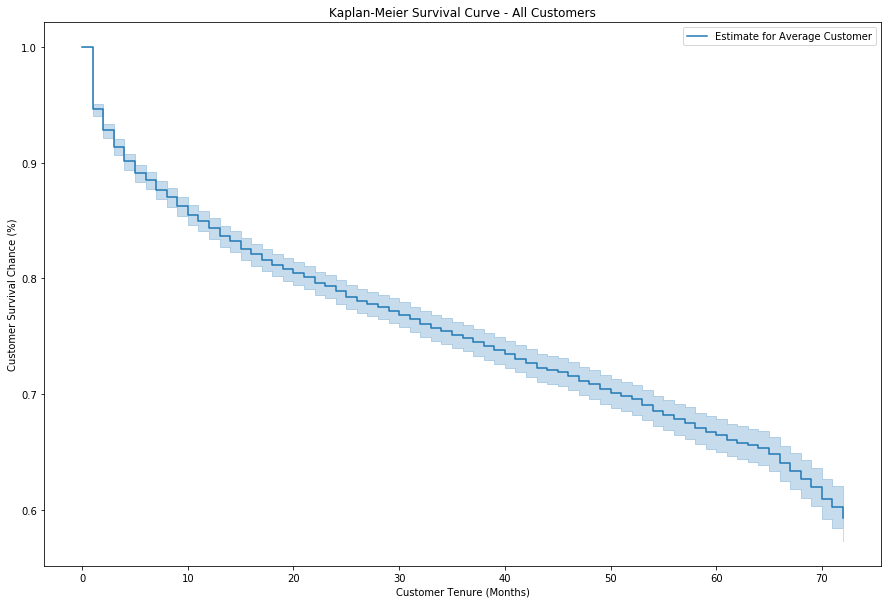

In [19]:
# plotting kmf curve
fig, ax = plt.subplots(figsize=(15,10))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve - All Customers')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

In [20]:
# Show the actual event table
kmf.event_table.head(21)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,11,0,11,7043,7043
1.0,613,380,233,0,7032
2.0,238,123,115,0,6419
3.0,200,94,106,0,6181
4.0,176,83,93,0,5981
5.0,133,64,69,0,5805
6.0,110,40,70,0,5672
7.0,131,51,80,0,5562
8.0,123,42,81,0,5431


**Interpretation** - at about 20 months out, a little over 80% of the customers have not churned
***

In [51]:
# function for creating Kaplan-Meier curve plots segmented by categorical variables
# Reverting back to original df since df1 has binary variables
def plot_categorical_survival(feature, t='tenure', event='Churn', df=df, ax=None):
    for cat in df[feature].unique():
        idx = df[feature] == cat
        kmf = lifelines.KaplanMeierFitter()
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat)
        kmf.plot(ax=ax, label=cat)

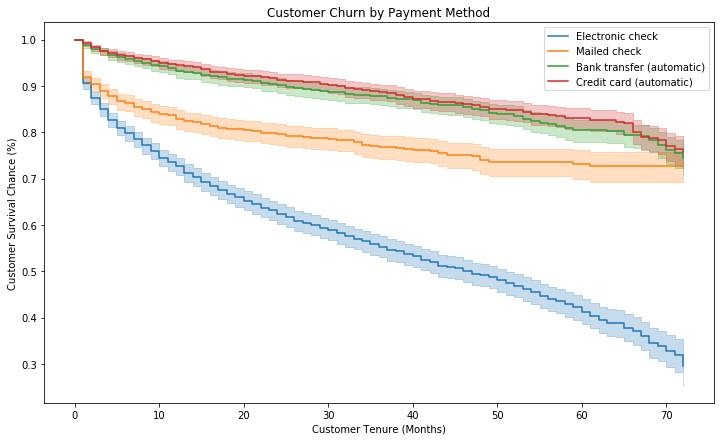

In [52]:
fig_pmt, ax_pmt = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='PaymentMethod', ax=ax_pmt)
ax_pmt.set_title('Customer Churn by Payment Method')
ax_pmt.set_xlabel('Customer Tenure (Months)')
ax_pmt.set_ylabel('Customer Survival Chance (%)')
plt.show()

Survival lines by payment methods. Automatic transfer is the king.

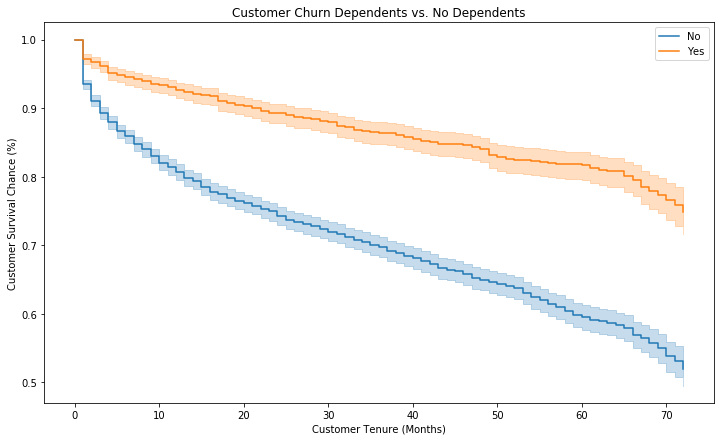

In [53]:
fig_dep, ax_dep = plt.subplots(figsize=(12,7))
plot_categorical_survival(feature='Dependents', ax=ax_dep)
ax_dep.set_title('Customer Churn Dependents vs. No Dependents')
ax_dep.set_xlabel('Customer Tenure (Months)')
ax_dep.set_ylabel('Customer Survival Chance (%)')
plt.show()

***
Cool graph with legends and such

In [63]:
import seaborn as sns
import matplotlib.patches as mpatches #for custom legends

Create binary variables as transformations of yes/no variables for numerical graphs

In [64]:
df["b_Churn"] = df.Churn.apply(lambda x: 1 if x == "Yes" else 0) #recode churn var

In [65]:
#drop "No phone service"
df[df.MultipleLines != "No phone service"]

#recode MultipleLines var to get our two comparison cohorts
df["b_MultipleLines"] = df.MultipleLines.apply(lambda x: 1 if x == "Yes" else 0)

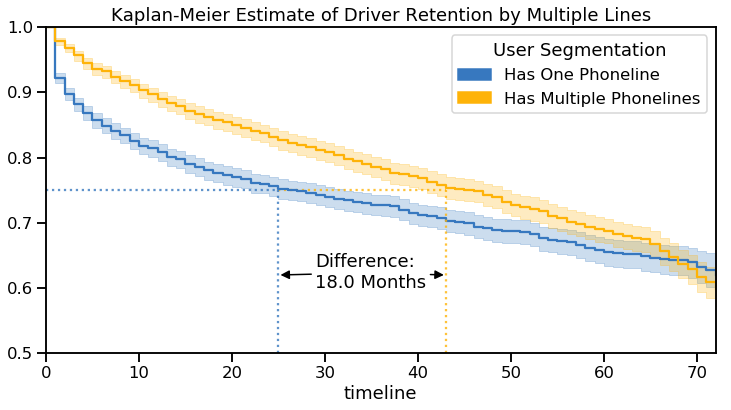

In [66]:
palette = ["windows blue", "amber"]
sns.set_palette(sns.xkcd_palette(palette))

##SET UP PLOT
ax = plt.subplot(111)
plt.title('Kaplan-Meier Estimate of Driver Retention by Multiple Lines')
sns.set_context("talk")

d={} #to store the models
vlines = []
i=0

##PLOT FITTED GRAPH
#loop through segmentation variable, plot on same axes
for segment in df.b_MultipleLines.unique(): 
    ix = df.b_MultipleLines == segment
    d['kmf{}'.format(i+1)] = kmf.fit(T.loc[ix],E.loc[ix], label=segment)
    ax = kmf.plot(ax=ax, figsize=(12,6))

    ax.set_xlim([T.min(),T.max()])
    ax.set_ylim([0.5,1])
    
    y_ = kmf.survival_function_[kmf.survival_function_.round(2) ==.75].dropna().index[0]
    ymax_ = kmf.survival_function_[kmf.survival_function_.round(2) ==.75].dropna()[i][y_]
    
    vlines.append([y_, ymax_])
    i+=1

##PLOT ANNOTATION
#for each intercept, plot a horizontal and a vertical line up to the fitted curve
xmin_=0
for i, xy in enumerate(vlines):
    xmax_ = xy[0]
    color="xkcd:{}".format(palette[i])
    
    plt.axvline(x=xy[0], ymax=.5, alpha=.8, color=color, linestyle='dotted') #axes fractional
    plt.hlines(y=.75, xmin=xmin_, xmax=xmax_, alpha=.8, color=color, linestyle='dotted') #axes data coordinates
    xmin_ += xmax_ #to avoid overlapping hlines

## position text label
difference = vlines[1][0]-vlines[0][0]
label_frac_x = (vlines[0][0]+(difference)/2)/T.max()-.07 #midpoint (minus .07 centering factor)
label_frac_y = 0.2

#label first line
ax.annotate('Difference:\n{} Months'.format(difference), 
  xy=(vlines[0][0],.62), xycoords='data', color='white',
  xytext=(label_frac_x,label_frac_y), textcoords='axes fraction',
  arrowprops=dict(arrowstyle="-|>", #arrows removed for reability
                  fc="k", ec="k")
           )

#label second line    
ax.annotate('Difference:\n{} Months'.format(difference), 
      xy=(vlines[1][0],.62), xycoords='data', color='black',
      xytext=(label_frac_x, label_frac_y), textcoords='axes fraction',
      arrowprops=dict(arrowstyle="-|>", #arrows removed for reability
                      fc="k", ec='k')
           )

##LEGEND
#override default legend
patches = [ mpatches.Patch(color="xkcd:windows blue", label='Has One Phoneline'),
            mpatches.Patch(color="xkcd:amber", label='Has Multiple Phonelines')
          ]
plt.legend(handles=[patches[0],patches[1]], title="User Segmentation", loc='best');

***
## Nelson Aalen Fitter
***

Like the Kaplan-Meier Fitter, Nelson Aalen Fitter also gives us an average view of the population. It is given by the number of deaths at time t divided by the number of subjects at risk. It is a non-parametric model. This means that there isn’t a functional form with parameters that we are fitting the data to. It doesn’t have any parameters to fit.

In [21]:
from lifelines import NelsonAalenFitter

In [22]:
naf=NelsonAalenFitter()
naf.fit(T,event_observed=E,label='Churn Rate at any point')

<lifelines.NelsonAalenFitter:"Churn Rate at any point", fitted with 7043 total observations, 5174 right-censored observations>

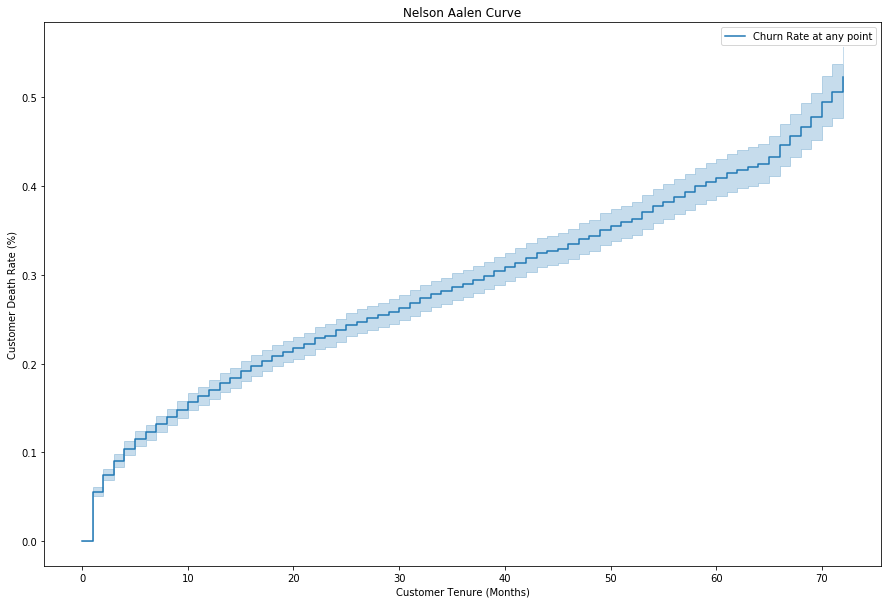

In [23]:
# plotting naf curve
fig, ax = plt.subplots(figsize=(15,10))
naf.plot(ax=ax)
ax.set_title('Nelson Aalen Curve')
ax.set_xlabel('Customer Tenure (Months)')
ax.set_ylabel('Customer Death Rate (%)')
plt.show()

***
## Cox Proportional Hazard Regression Model
***

Like the Kaplan-Meier Fitter, Nelson Aalen Fitter also gives us an average view of the population[7]. It is given by the number of deaths at time t divided by the number of subjects at risk. It is a non-parametric model. This means that there isn’t a functional form with parameters that we are fitting the data to. It doesn’t have any parameters to fit[7].

In [24]:
from lifelines import CoxPHFitter

***
Transform columns to work with the Cox Proportional Hazard Fitter

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,False
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


Drop customer ID, gender, phone service, and internet service, as these cannot be used as features

In [28]:
# Create list of features to drop
features_to_drop = ['customerID', 'gender', 'PhoneService', 'InternetService','b_Churn','b_MultipleLines']

In [31]:
# Create new dataset without these variables
df1 = df.drop(features_to_drop, axis=1).copy()

Total charges didn't come in as numeric, change here

In [32]:
# If ‘coerce’, then invalid parsing will be set as NaN.
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1['TotalCharges'].fillna(0, inplace=True)

In [33]:
# Change yes/no variables to 1/0 variables
binary_features = ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV','StreamingMovies', 'PaperlessBilling']

for feat in binary_features:
    df1[feat] = df1[feat] == 'Yes'

In [34]:
# Get Dummies is better than one hot encoding but not as good as label encoder which is not as good as case when...
ohe_features = ['MultipleLines', 'Contract', 'PaymentMethod']
df1 = pd.get_dummies(df1, drop_first=True, columns=ohe_features)

In [35]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,True,False,1.0,False,True,False,False,False,False,...,29.85,29.85,False,1,0,0,0,0,1,0
1,0,False,False,34.0,True,False,True,False,False,False,...,56.95,1889.50,False,0,0,1,0,0,0,1
2,0,False,False,2.0,True,True,False,False,False,False,...,53.85,108.15,True,0,0,0,0,0,0,1
3,0,False,False,45.0,True,False,True,True,False,False,...,42.30,1840.75,False,1,0,1,0,0,0,0
4,0,False,False,2.0,False,False,False,False,False,False,...,70.70,151.65,True,0,0,0,0,0,1,0


Finished up editing dataset
***

Set up Cox Proportional Hazard model here with tenure and churn as labels

In [39]:
cph=CoxPHFitter()
cph.fit(df1,duration_col='tenure',event_col='Churn',show_progress=False) #Show progress shows iterations

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [40]:
cph.print_summary()

Focus on exp(coef) - the scaling of hazard risk for each additional unit of the variable, 1.00 being neutral. It's an odds ratio

E.G. the last exp(coefficient), corresponding to PaymentMethod_Mailed check, means a customer that pays by mailing a check is 1.68 times as likely to cancel their service.

For the company, exp(coef) below 1.0 is good, meaning a customer less likely to cancel.

To better visualize the above, we can plot the coefficient outputs and their confidence intervals.

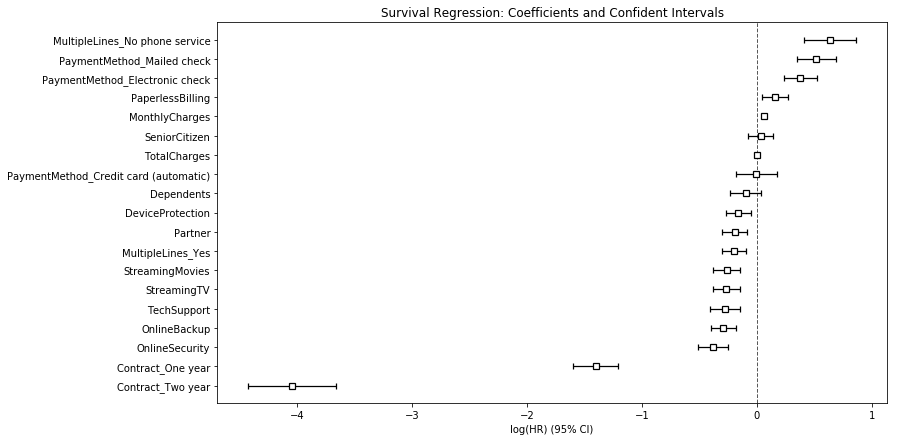

In [41]:
# plotting coefficients
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title('Survival Regression: Coefficients and Confident Intervals')
cph.plot(ax=ax);

More likely to churn - No phone service, mailing check as payment method or electronic check.
Less likely to churn - Contracts at two years or even one year, online security and online backups

Interpretation: Folks are more likely to churn when they are not enrolled in auto pay with their credit card. They ar less likely to chrun when they are locked into a contract or involved in multiple other products.
***

### View individual covariates as they change

In [42]:
# df1['Contract_Two year'].unique()
df1['MultipleLines_No phone service'].unique()

array([1, 0], dtype=uint64)

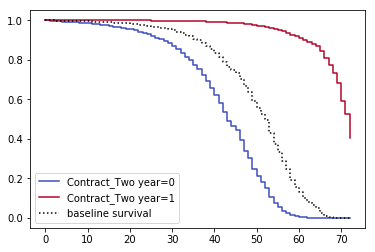

In [43]:
cph.plot_covariate_groups('Contract_Two year',[0,1],cmap='coolwarm')

They survival line reaches out much further when the customer has a two year contract

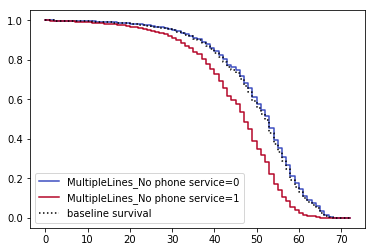

In [29]:
cph.plot_covariate_groups('MultipleLines_No phone service',[0,1],cmap='coolwarm')

No phone service lowers survival times

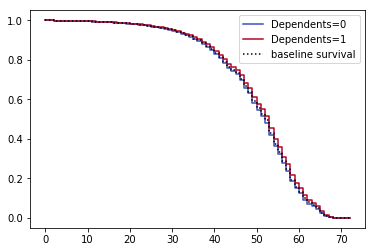

In [54]:
cph.plot_covariate_groups('Dependents',[0,1],cmap='coolwarm')

***


***
## Survival Analysis
***

One thing to point out is that the lifelines package assumes that every subject experienced the event of interest unless we specify it explicitly[8].

In [67]:
from lifelines.statistics import logrank_test #survival statistical testing

In [69]:
multi = (df["b_MultipleLines"] == 1)
results = logrank_test(T[multi], T[~multi], E[multi], E[~multi], alpha=0.99 ) #at 99% confidence level
results.print_summary()

In [71]:
Z = results.test_statistic
D = E.sum() #number of events observed

hazard_ratio = np.exp(Z*np.sqrt(4/D))
print(hazard_ratio)

3.157035574094717


Therefore the risk of churn is 3.2 times higher in users with only one phoneline compared to users with multiple lines.